In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [9]:
path = '../data_for_models/data.csv'
df = pd.read_csv(path)
df = df.dropna()
df = df.drop('Unnamed: 0', axis=1)
df.columns

Index(['TC_FAN_STATE', 'TC_COMPRESSOR_STATE', 'TC_EVI_STATE',
       'TC_REVERSING_VALVE_STATE', 'TC_DRIP_TRAY_DEFROST_STATE',
       'TC_DHW_HEATER_STATE', 'TC_UPPER_SOURCE_PUMP_STATE',
       'TC_HEATING_VALVE_STATE', 'TC_COMPRESSOR_BACKUP_HEATER_STATE',
       'TC_DHW_TEMP', 'TC_OUTSIDE_TEMP', 'TC_COMPRESSED_GAS_TEMP',
       'TC_BUFFER_TEMP_UPPER', 'TC_BUFFER_TEMP_LOWER', 'TC_CONDENSER_TEMP',
       'TC_EVAPORATOR_TEMP', 'TC_UPPER_SOURCE_RETURN_TEMP',
       'TC_UPPER_SOURCE_IN_TEMP', 'TC_COMPRESSOR_OIL_TEMP', 'TC_CURRENT_FLOW',
       'TC_CURRENT_BUFFER_SETPOINT', 'TC_UPPER_SOURCE_DELTA',
       'TC_EVD_PROBE_S1_READING', 'TC_EVD_PROBE_S2_READING',
       'TC_EVD_PROBE_S3_READING', 'TC_EVD_PROBE_S4_READING',
       'TC_EVD_SUCTION_TEMPERATURE', 'TC_EVD_EVAPORATION_TEMPERATURE',
       'TC_EVD_EVAPORATION_PRESSURE', 'TC_EVD_SUPER_HEAT',
       'TC_EVD_CONDENSING_PRESSURE', 'TC_EVD_CONDENSING_TEMPERATURE',
       'TC_EVD_VALVE_OPENING', 'TC_CURRENT_POWER_CONSUMPTION',
       'TC_CUR

In [10]:
df.head()

,TC_FAN_STATE,TC_COMPRESSOR_STATE,TC_EVI_STATE,TC_REVERSING_VALVE_STATE,TC_DRIP_TRAY_DEFROST_STATE,TC_DHW_HEATER_STATE,TC_UPPER_SOURCE_PUMP_STATE,TC_HEATING_VALVE_STATE,TC_COMPRESSOR_BACKUP_HEATER_STATE,TC_DHW_TEMP,...,TC_EVD_CONDENSING_TEMPERATURE,TC_EVD_VALVE_OPENING,TC_CURRENT_POWER_CONSUMPTION,TC_CURRENT_ENERGY_OUTPUT,TC_CURRENT_COP,TC_HEATER_CURRENT_MINUTE_DEGREE,TC_MINUTES_SINCE_LAST_DEFROST,TC_COMPRESSOR_LAST_WORK_TIME,TC_COMPRESSOR_LAST_STOP_TIME,TIME
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,...,411.0,0.0,0,0,0,0.0,1501.0,2003.0,180.0,2019-12-07 12:52:00
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,...,397.0,0.0,0,0,0,0.0,1561.0,2003.0,240.0,2019-12-07 12:53:00
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,...,397.0,0.0,0,0,0,0.0,1621.0,2003.0,300.0,2019-12-07 12:54:00
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,...,397.0,0.0,0,0,0,0.0,1681.0,2003.0,360.0,2019-12-07 12:55:00
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,...,396.0,0.0,0,0,0,0.0,1741.0,2003.0,420.0,2019-12-07 12:56:00


In [4]:
df['TC_BUFFER_DELTA_UP_DOWN'] = df['TC_BUFFER_TEMP_UPPER'] - df['TC_BUFFER_TEMP_LOWER']
df['TC_BUFFER_TO_SET'] = df['TC_CURRENT_BUFFER_SETPOINT'] - df['TC_BUFFER_TEMP_UPPER'] 
df[['TC_CURRENT_BUFFER_SETPOINT', 
    'TC_BUFFER_TEMP_UPPER', 
    'TC_BUFFER_TEMP_LOWER', 
    'TC_BUFFER_DELTA_UP_DOWN', 
    'TC_BUFFER_TO_SET',
    'TC_DHW_TEMP',
    'TC_COMPRESSOR_STATE'
   ]]

,TC_CURRENT_BUFFER_SETPOINT,TC_BUFFER_TEMP_UPPER,TC_BUFFER_TEMP_LOWER,TC_BUFFER_DELTA_UP_DOWN,TC_BUFFER_TO_SET,TC_DHW_TEMP,TC_COMPRESSOR_STATE
0,397.0,421.0,392.0,29.0,-24.0,76.0,0
1,397.0,420.0,392.0,28.0,-23.0,76.0,0
2,397.0,417.0,390.0,27.0,-20.0,80.0,0
3,397.0,417.0,387.0,30.0,-20.0,83.0,0
4,397.0,418.0,384.0,34.0,-21.0,85.0,0
...,...,...,...,...,...,...,...
399170,400.0,401.0,380.0,21.0,-1.0,392.0,0
399171,400.0,399.0,377.0,22.0,1.0,394.0,0
399172,400.0,397.0,376.0,21.0,3.0,395.0,0
399173,400.0,394.0,376.0,18.0,6.0,394.0,0


In [5]:
df[df.TC_DHW_TEMP < 10]

,TC_FAN_STATE,TC_COMPRESSOR_STATE,TC_EVI_STATE,TC_REVERSING_VALVE_STATE,TC_DRIP_TRAY_DEFROST_STATE,TC_DHW_HEATER_STATE,TC_UPPER_SOURCE_PUMP_STATE,TC_HEATING_VALVE_STATE,TC_COMPRESSOR_BACKUP_HEATER_STATE,TC_DHW_TEMP,...,TC_CURRENT_POWER_CONSUMPTION,TC_CURRENT_ENERGY_OUTPUT,TC_CURRENT_COP,TC_HEATER_CURRENT_MINUTE_DEGREE,TC_MINUTES_SINCE_LAST_DEFROST,TC_COMPRESSOR_LAST_WORK_TIME,TC_COMPRESSOR_LAST_STOP_TIME,TIME,TC_BUFFER_DELTA_UP_DOWN,TC_BUFFER_TO_SET
10357,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,3.0,...,36,141,39,0.0,3931.0,540.0,2216.0,2019-12-10 17:02:00,19.0,16.0
10358,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,2.0,...,36,140,39,0.0,4111.0,720.0,2216.0,2019-12-10 17:03:00,22.0,14.0
10359,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,2.0,...,36,140,39,0.0,4231.0,810.0,2216.0,2019-12-10 17:04:00,22.0,14.0
10360,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,0.0,...,36,140,39,0.0,4291.0,870.0,2216.0,2019-12-10 17:05:00,23.0,12.0
10361,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,0.0,...,39,139,35,0.0,4351.0,930.0,2216.0,2019-12-10 17:06:00,20.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258811,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,4.0,...,39,139,39,0.0,1471.0,6060.0,2241.0,2020-01-21 08:18:00,21.0,-17.0
258812,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,3.0,...,36,140,39,0.0,1531.0,6120.0,2241.0,2020-01-21 08:19:00,20.0,-17.0
258813,90,1,0.0,0.0,0.0,1.0,90.0,0.0,0.0,5.0,...,36,141,39,0.0,1591.0,6180.0,2241.0,2020-01-21 08:20:00,20.0,-15.0
258814,40,0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,4.0,...,36,113,39,0.0,1621.0,6205.0,2241.0,2020-01-21 08:21:00,20.0,-17.0


In [23]:
state = df.TC_COMPRESSOR_STATE.values

In [27]:
state_info = []
for i, s in enumerate(state):
    if s != state[i - 1]:
        state_info.append(1)
    else:
        state_info.append(0)

In [31]:
len(state_info), df.shape

(185190, (185190, 43))

In [32]:
df['STATE_CHANGE'] = state_info

In [34]:
df[df.STATE_CHANGE == 1]['TIME']

43        2019-12-07 13:35:00
75        2019-12-07 14:07:00
118       2019-12-07 14:50:00
151       2019-12-07 15:23:00
194       2019-12-07 16:07:00
                 ...         
266609    2020-01-21 20:55:00
266651    2020-01-21 21:37:00
266682    2020-01-21 22:08:00
266736    2020-01-21 23:03:00
266766    2020-01-21 23:33:00
Name: TIME, Length: 2704, dtype: object

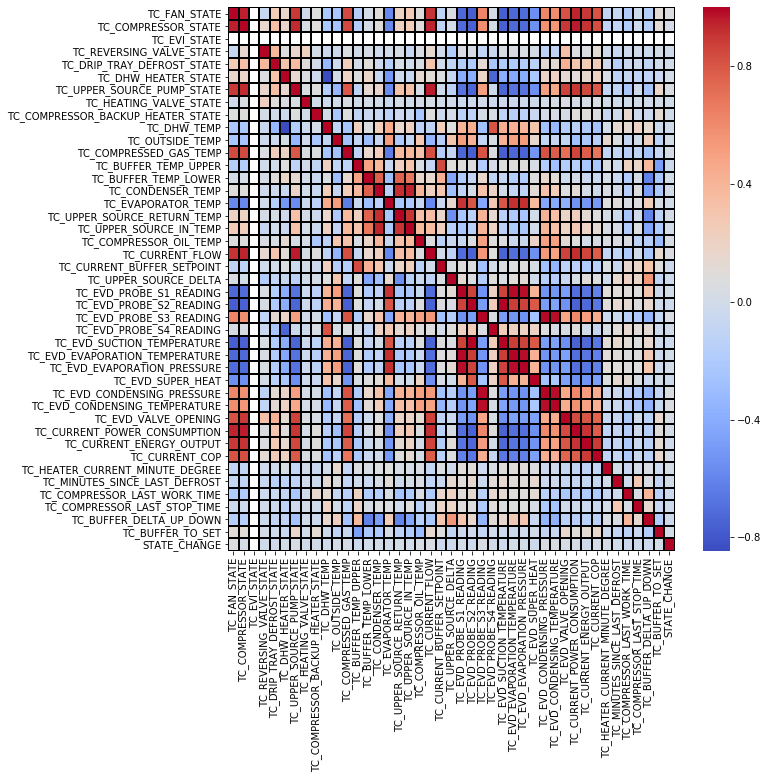

In [36]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap= 'coolwarm', linewidths=1, linecolor='black', annot=False)

In [11]:
temp_propane = [-430, -290, -180, -10, 160, 270, 320, 380, 430, 540, 600, 700]
pres_propane = [0, 7, 15, 36, 64, 88, 103, 119, 136, 179, 201, 248]
func = [0.000186 * (x ** 2) + 0.16 * x + 32.84 for x in temp_propane]

In [12]:
def point_in_margin_function(x, y, margin=10):
    y_up = [0.000186 * (i ** 2) + 0.16 * i + 32.84 + margin for i in x]
    y_down = [0.000186 * (i ** 2) + 0.16 * i + 32.84 - margin for i in x]
    return [1 if yu >= i >= yd else 0 for (i,yu,yd) in zip(y, y_up, y_down) ]

In [13]:
df['in_function'] = point_in_margin_function(df.TC_EVD_CONDENSING_TEMPERATURE, df.TC_EVD_CONDENSING_PRESSURE)

In [88]:
df['WORK_TIMER'] = df.TC_COMPRESSOR_STATE * df.TC_COMPRESSOR_LAST_WORK_TIME
df = df[df.WORK_TIMER >= 0]
cleaned_df = df[df.in_function == 1]
plt.figure(figsize=(15, 15))
plt.scatter(df.TC_EVD_CONDENSING_TEMPERATURE, df.TC_EVD_CONDENSING_PRESSURE, marker='o', alpha=.01, label='cond')
plt.scatter(df.TC_EVD_EVAPORATION_TEMPERATURE, df.TC_EVD_EVAPORATION_PRESSURE, marker='o', alpha=.01, label='evap')
plt.scatter(cleaned_df.TC_EVD_CONDENSING_TEMPERATURE, cleaned_df.TC_EVD_CONDENSING_PRESSURE, marker='o', alpha=.01, label='cond_clean')
plt.scatter(temp_propane, pres_propane, marker='o', alpha=.5, label='func')
plt.xlabel = 'Temp'
plt.ylabel = 'Cisnienie'
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'in_function'

In [9]:
df[df.index == 310017][['TC_EVD_CONDENSING_TEMPERATURE', 'TC_EVD_CONDENSING_PRESSURE']]

,TC_EVD_CONDENSING_TEMPERATURE,TC_EVD_CONDENSING_PRESSURE
310017,48.0,230.0


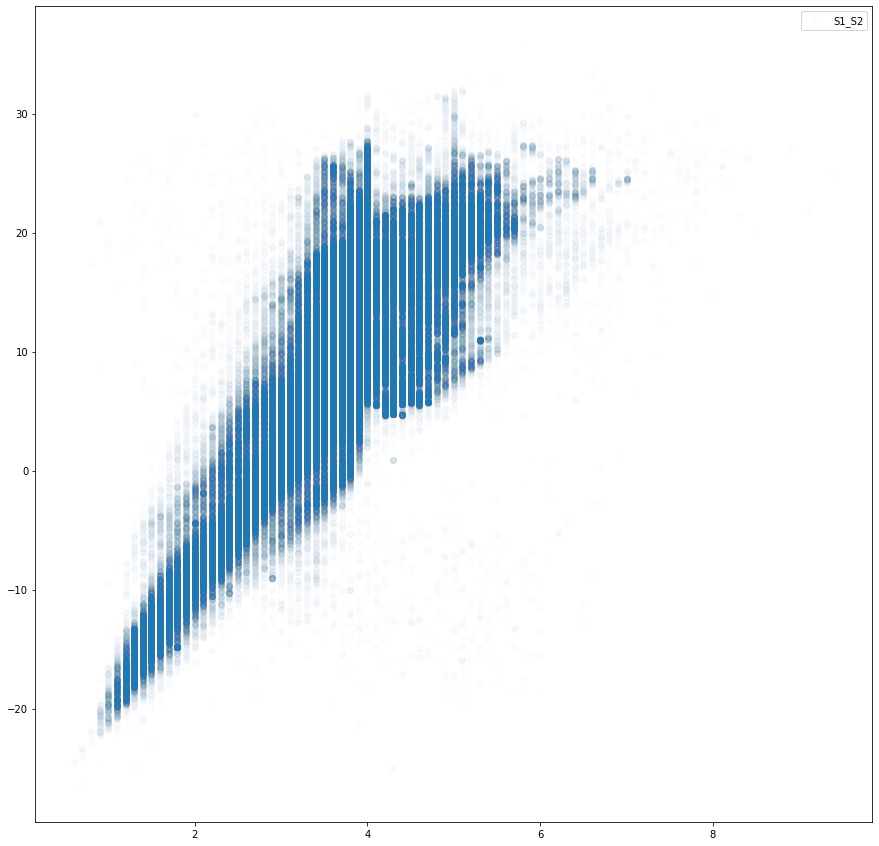

In [84]:
plt.figure(figsize=(15, 15))
plt.scatter(df.TC_EVD_PROBE_S1_READING/10, df.TC_EVD_PROBE_S2_READING/10, marker='o', alpha=.01, label='S1_S2')
plt.xlabel = 'Cisnienie'
plt.ylabel = 'Temp'
plt.legend()
plt.show()

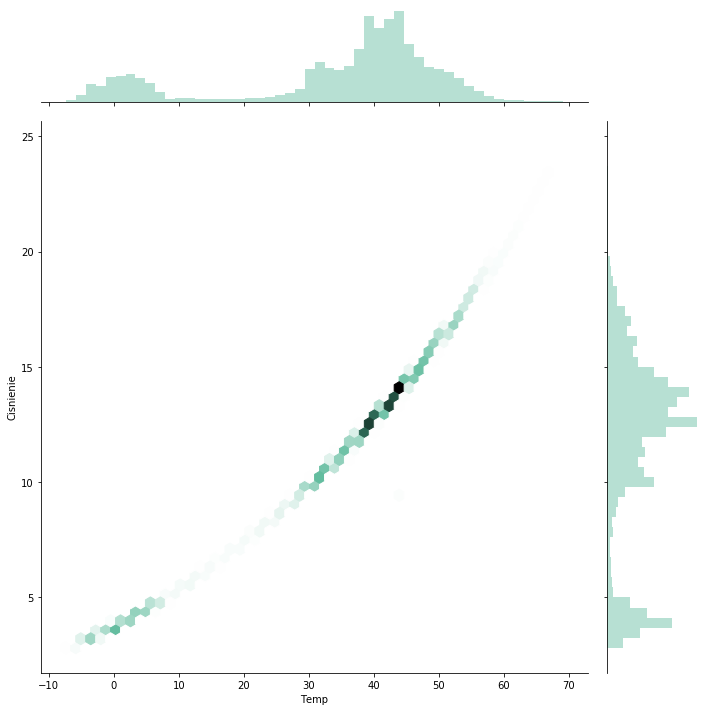

In [48]:
sns.jointplot(df.TC_EVD_CONDENSING_TEMPERATURE/10, df.TC_EVD_CONDENSING_PRESSURE/10, kind="hex", color="#4CB391", height=10).set_axis_labels("Temp", "Cisnienie")

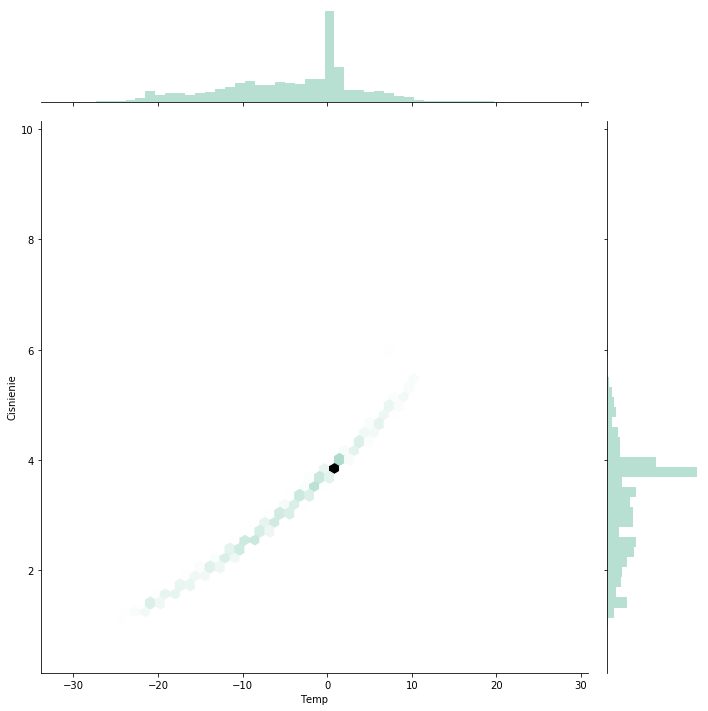

In [50]:
sns.jointplot(df.TC_EVD_EVAPORATION_TEMPERATURE/10, df.TC_EVD_EVAPORATION_PRESSURE/10, kind="hex", color="#4CB391", height=10).set_axis_labels("Temp", "Cisnienie")

In [3]:
df.columns

Index(['TC_FAN_STATE', 'TC_COMPRESSOR_STATE', 'TC_EVI_STATE',
       'TC_REVERSING_VALVE_STATE', 'TC_DRIP_TRAY_DEFROST_STATE',
       'TC_DHW_HEATER_STATE', 'TC_UPPER_SOURCE_PUMP_STATE',
       'TC_HEATING_VALVE_STATE', 'TC_COMPRESSOR_BACKUP_HEATER_STATE',
       'TC_DHW_TEMP', 'TC_OUTSIDE_TEMP', 'TC_COMPRESSED_GAS_TEMP',
       'TC_BUFFER_TEMP_UPPER', 'TC_BUFFER_TEMP_LOWER', 'TC_CONDENSER_TEMP',
       'TC_EVAPORATOR_TEMP', 'TC_UPPER_SOURCE_RETURN_TEMP',
       'TC_UPPER_SOURCE_IN_TEMP', 'TC_COMPRESSOR_OIL_TEMP', 'TC_CURRENT_FLOW',
       'TC_CURRENT_BUFFER_SETPOINT', 'TC_UPPER_SOURCE_DELTA',
       'TC_EVD_PROBE_S1_READING', 'TC_EVD_PROBE_S2_READING',
       'TC_EVD_PROBE_S3_READING', 'TC_EVD_PROBE_S4_READING',
       'TC_EVD_SUCTION_TEMPERATURE', 'TC_EVD_EVAPORATION_TEMPERATURE',
       'TC_EVD_EVAPORATION_PRESSURE', 'TC_EVD_SUPER_HEAT',
       'TC_EVD_CONDENSING_PRESSURE', 'TC_EVD_CONDENSING_TEMPERATURE',
       'TC_EVD_VALVE_OPENING', 'TC_CURRENT_POWER_CONSUMPTION',
       'TC_CUR

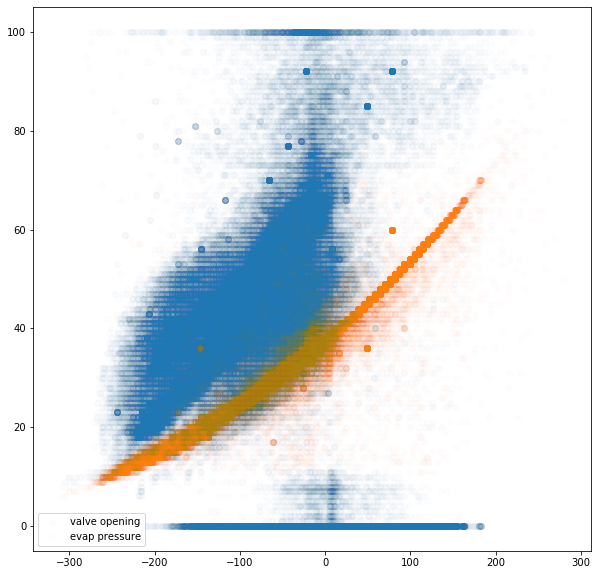

In [83]:
plt.figure(figsize=(10, 10))
plt.scatter(df.TC_EVD_EVAPORATION_TEMPERATURE, df.TC_EVD_VALVE_OPENING, marker='o', alpha=.01, label='valve opening')
plt.scatter(df.TC_EVD_EVAPORATION_TEMPERATURE, df.TC_EVD_EVAPORATION_PRESSURE, marker='o', alpha=.01, label='evap pressure')
plt.legend()
plt.show()

In [89]:
path = '../data_for_models/data.csv'
df = pd.read_csv(path)
path = '../data_for_models/data1.csv'
df1 = pd.read_csv(path)

df['WORK_TIMER'] = df.TC_COMPRESSOR_STATE * df.TC_COMPRESSOR_LAST_WORK_TIME
df1['WORK_TIMER'] = df1.TC_COMPRESSOR_STATE * df1.TC_COMPRESSOR_LAST_WORK_TIME

In [28]:
feature_names = ['TC_COMPRESSOR_STATE', 
                 'TC_UPPER_SOURCE_PUMP_STATE',
                 'TC_CURRENT_FLOW',
                 'TC_CURRENT_POWER_CONSUMPTION',
                 'TC_COMPRESSOR_OIL_TEMP',
                  'TC_EVD_VALVE_OPENING',
                 'TC_EVD_CONDENSING_PRESSURE']

In [29]:
df[feature_names].describe()

,TC_COMPRESSOR_STATE,TC_UPPER_SOURCE_PUMP_STATE,TC_CURRENT_FLOW,TC_CURRENT_POWER_CONSUMPTION,TC_COMPRESSOR_OIL_TEMP,TC_EVD_VALVE_OPENING,TC_EVD_CONDENSING_PRESSURE
count,515560.000000,512150.000000,512307.000000,515560.000000,512282.000000,512612.000000,512612.000000
mean,0.444294,47.152983,12330.008831,17.092476,219.380632,20.156030,116.227974
std,0.496888,41.932181,11261.694520,19.338690,64.854195,24.686671,39.388778
min,0.000000,0.000000,-32376.000000,0.000000,-101.000000,0.000000,28.000000
25%,0.000000,0.000000,0.000000,0.000000,185.000000,0.000000,98.000000
50%,0.000000,30.000000,9050.000000,3.000000,224.000000,0.000000,124.000000
75%,1.000000,90.000000,24240.000000,39.000000,263.000000,40.000000,143.000000
max,1.000000,100.000000,32760.000000,532.000000,400.000000,100.000000,246.000000


In [30]:
df1[feature_names].describe()

,TC_COMPRESSOR_STATE,TC_UPPER_SOURCE_PUMP_STATE,TC_CURRENT_FLOW,TC_CURRENT_POWER_CONSUMPTION,TC_COMPRESSOR_OIL_TEMP,TC_EVD_VALVE_OPENING,TC_EVD_CONDENSING_PRESSURE
count,4404.000000,4402.000000,4402.000000,4404.000000,4402.000000,4402.000000,4402.000000
mean,0.398047,36.333485,9357.130850,10.752725,233.083144,20.930259,112.866424
std,0.489551,42.696070,11599.961299,17.311259,79.929609,26.645397,43.353751
min,0.000000,0.000000,-32636.000000,0.000000,53.000000,0.000000,37.000000
25%,0.000000,0.000000,0.000000,0.000000,192.000000,0.000000,80.000000
50%,0.000000,0.000000,0.000000,0.000000,261.000000,0.000000,123.000000
75%,1.000000,90.000000,19840.000000,25.000000,289.000000,49.000000,142.000000
max,1.000000,100.000000,30360.000000,50.000000,355.000000,120.000000,208.000000


In [50]:
df.drop(['Unnamed: 0'], axis=1).describe().loc['min']

TC_FAN_STATE                             0.0
TC_COMPRESSOR_STATE                      0.0
TC_EVI_STATE                             0.0
TC_REVERSING_VALVE_STATE                 0.0
TC_DRIP_TRAY_DEFROST_STATE               0.0
TC_DHW_HEATER_STATE                      0.0
TC_UPPER_SOURCE_PUMP_STATE               0.0
TC_HEATING_VALVE_STATE                   0.0
TC_COMPRESSOR_BACKUP_HEATER_STATE        0.0
TC_DHW_TEMP                            -18.0
TC_OUTSIDE_TEMP                       -158.0
TC_COMPRESSED_GAS_TEMP                  -1.0
TC_BUFFER_TEMP_UPPER                   249.0
TC_BUFFER_TEMP_LOWER                   142.0
TC_CONDENSER_TEMP                       57.0
TC_EVAPORATOR_TEMP                    -469.0
TC_UPPER_SOURCE_RETURN_TEMP             38.0
TC_UPPER_SOURCE_IN_TEMP                  0.0
TC_COMPRESSOR_OIL_TEMP                -101.0
TC_CURRENT_FLOW                     -32376.0
TC_CURRENT_BUFFER_SETPOINT             300.0
TC_UPPER_SOURCE_DELTA                 -227.0
TC_EVD_PRO

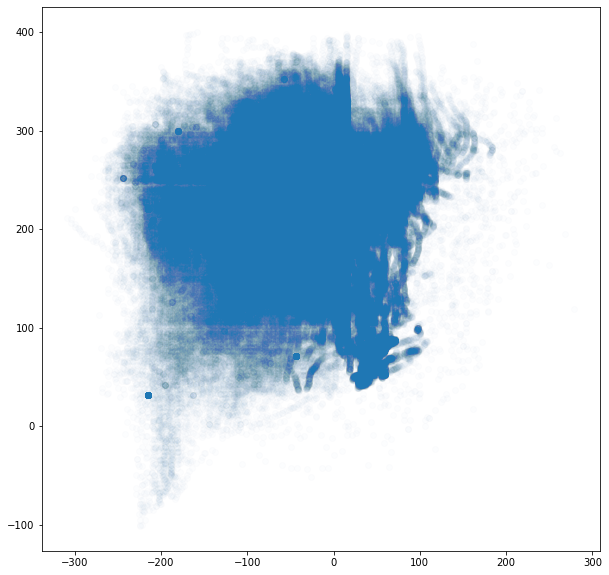

In [79]:
val = df[['TC_EVD_EVAPORATION_TEMPERATURE', 'TC_COMPRESSOR_OIL_TEMP']].values
x = val[:, 0]
y = val[:, 1]
plt.figure(figsize=(10,10))
plt.scatter(x, y, marker='o', alpha=0.01)

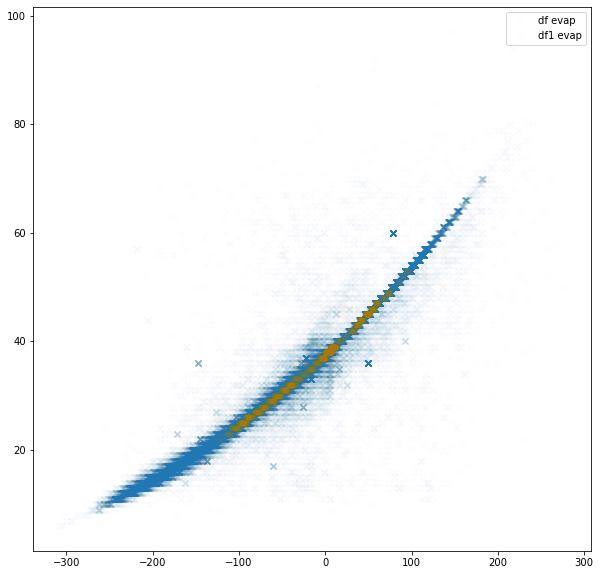

In [73]:
plt.figure(figsize=(10, 10))
plt.scatter(df.TC_EVD_EVAPORATION_TEMPERATURE, df.TC_EVD_EVAPORATION_PRESSURE, marker='x', alpha=.01, label='df evap')
plt.scatter(df1.TC_EVD_EVAPORATION_TEMPERATURE, df1.TC_EVD_EVAPORATION_PRESSURE, marker='o', alpha=.01, label='df1 evap')
plt.legend()
plt.show()

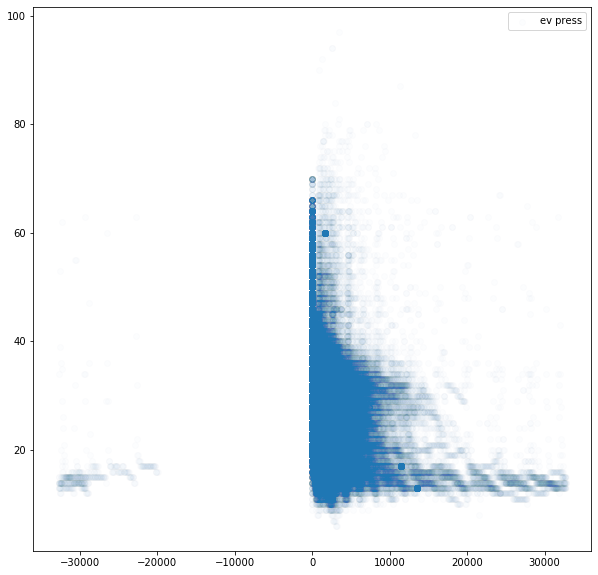

In [90]:
plt.figure(figsize=(10, 10))
plt.scatter(df.WORK_TIMER, df.TC_EVD_EVAPORATION_PRESSURE, marker='o', alpha=.01, label='ev press')
plt.legend()
plt.show()